# ggplot2

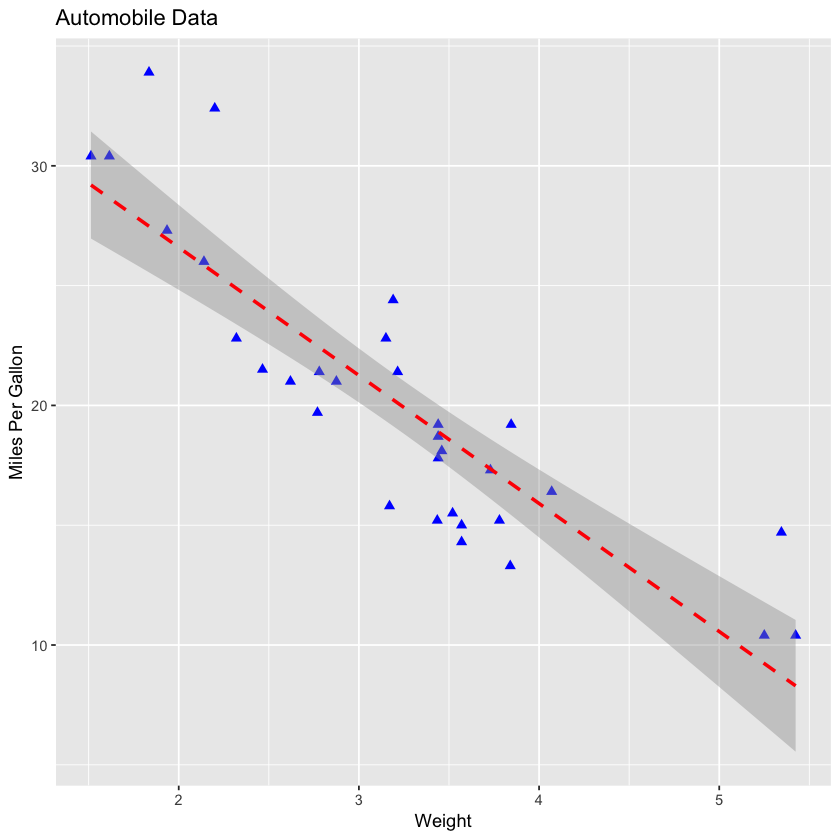

In [1]:
library("ggplot2")
ggplot(data=mtcars, aes(x=wt, y=mpg)) + geom_point(pch=17, color="blue", size=2) + geom_smooth(method="lm", color="red", linetype=2) + labs(title="Automobile Data", x="Weight", y="Miles Per Gallon")

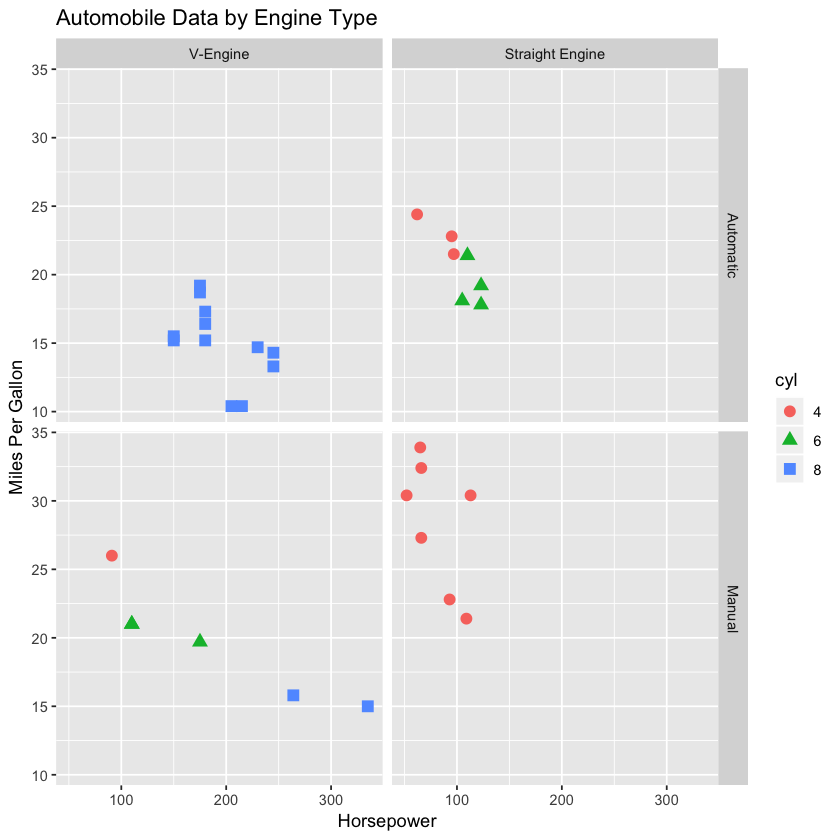

In [2]:
mtcars$am = factor(mtcars$am, levels=c(0,1),
labels=c("Automatic", "Manual"))
mtcars$vs = factor(mtcars$vs, levels=c(0,1),
labels=c("V-Engine", "Straight Engine"))
mtcars$cyl = factor(mtcars$cyl)
ggplot(data=mtcars, aes(x=hp, y=mpg, shape=cyl, color=cyl)) + geom_point(size=3)+ facet_grid(am~vs) + labs(title="Automobile Data by Engine Type", x="Horsepower", y="Miles Per Gallon")

A plot is constructed “layer by layer” (semantically, not graphically). Remark: a plot is rendered only when it is plotted to the device.

Layers are stacked/chained via the overloaded ‘+’ operator

The ‘+’ operation is not commutative

不断地一层层地覆盖，后面的会盖住前面的

In [7]:
salaries = read.csv("./data/Salaries.csv")
head(salaries)

rank,discipline,yrs.since.phd,yrs.service,sex,salary
Prof,B,19,18,Male,139750
Prof,B,20,16,Male,173200
AsstProf,B,4,3,Male,79750
Prof,B,45,39,Male,115000
Prof,B,40,41,Male,141500
AssocProf,B,6,6,Male,97000


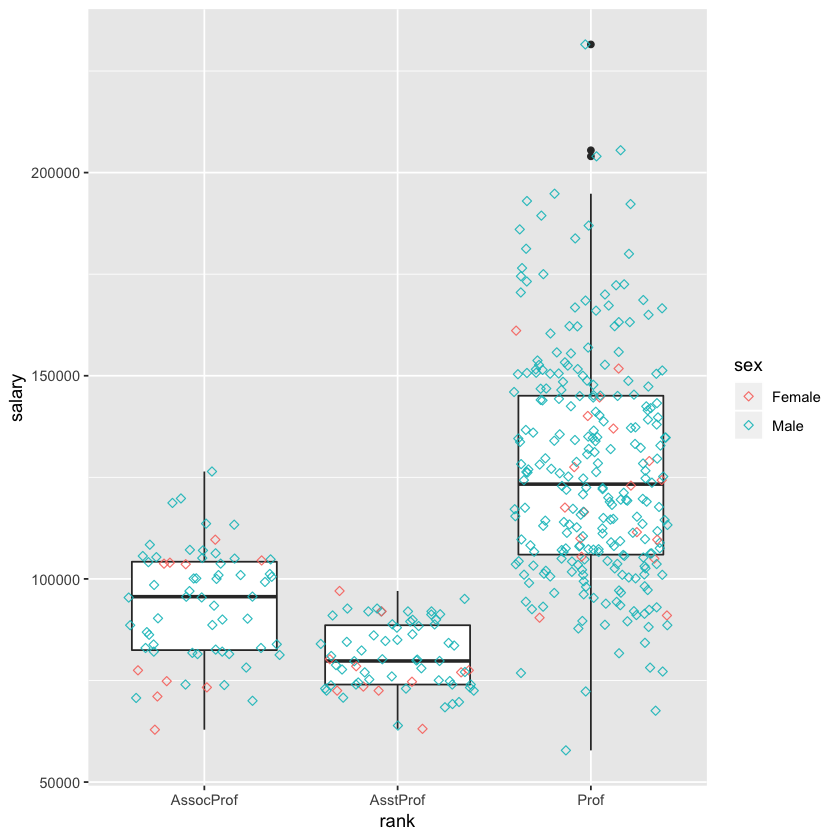

In [8]:
ggplot(data = salaries, aes(x=rank, y=salary)) + geom_boxplot() + geom_jitter(aes(color=sex), alpha=0.9, shape=5)

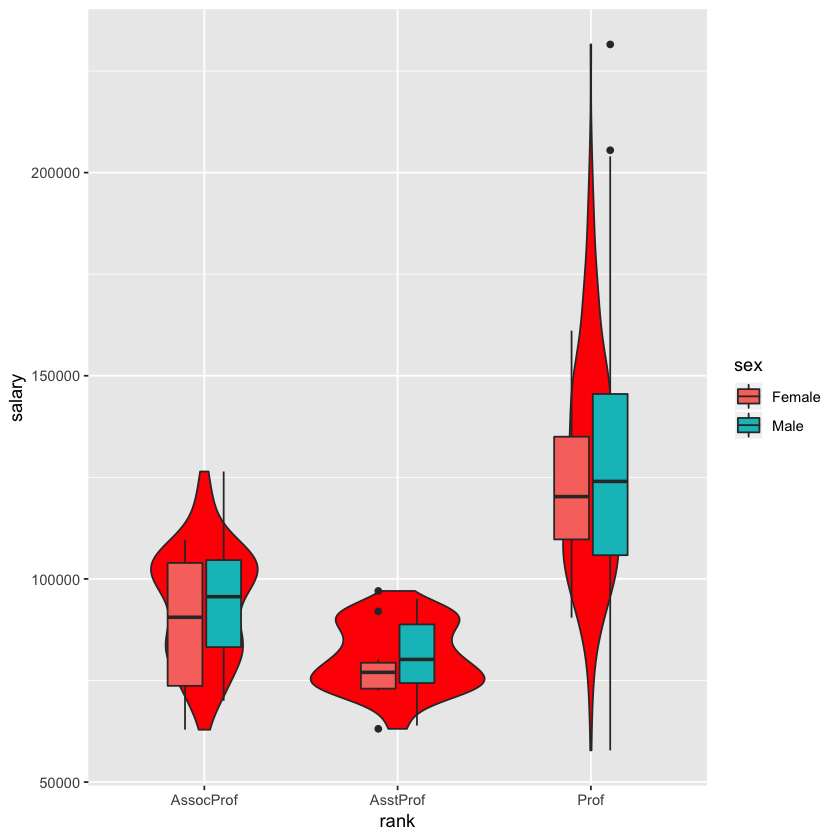

In [9]:
ggplot(data = salaries, aes(x=rank, y=salary, fill=sex)) + geom_violin(fill="red") + geom_boxplot(width=0.4)

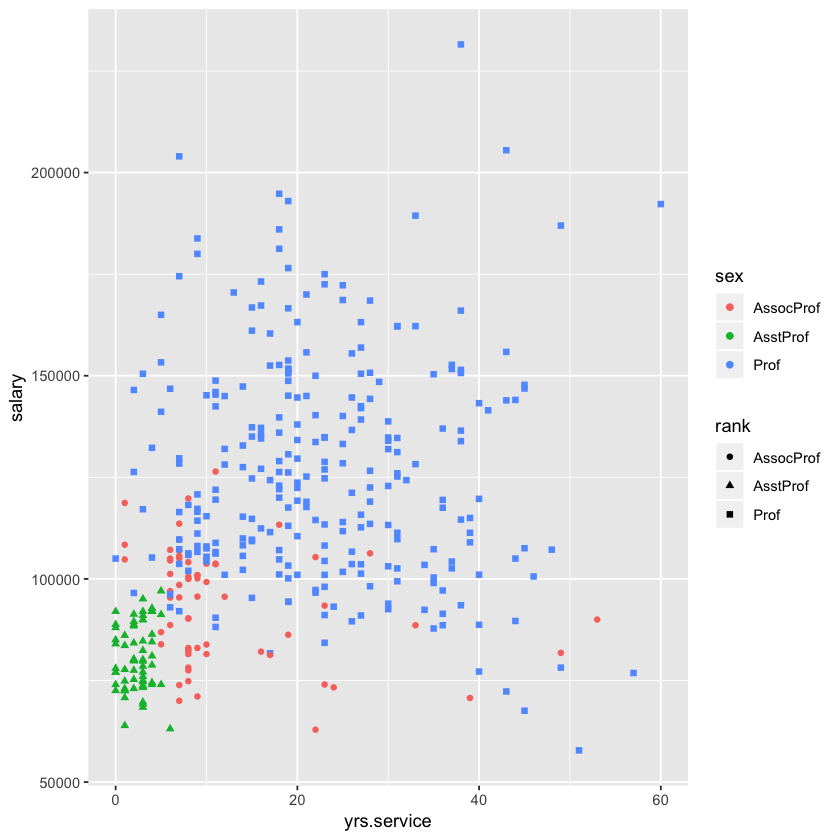

In [10]:
ggplot(data=salaries, aes(x=yrs.service, y = salary, color=sex)) + geom_point(aes(color=rank, shape=rank))

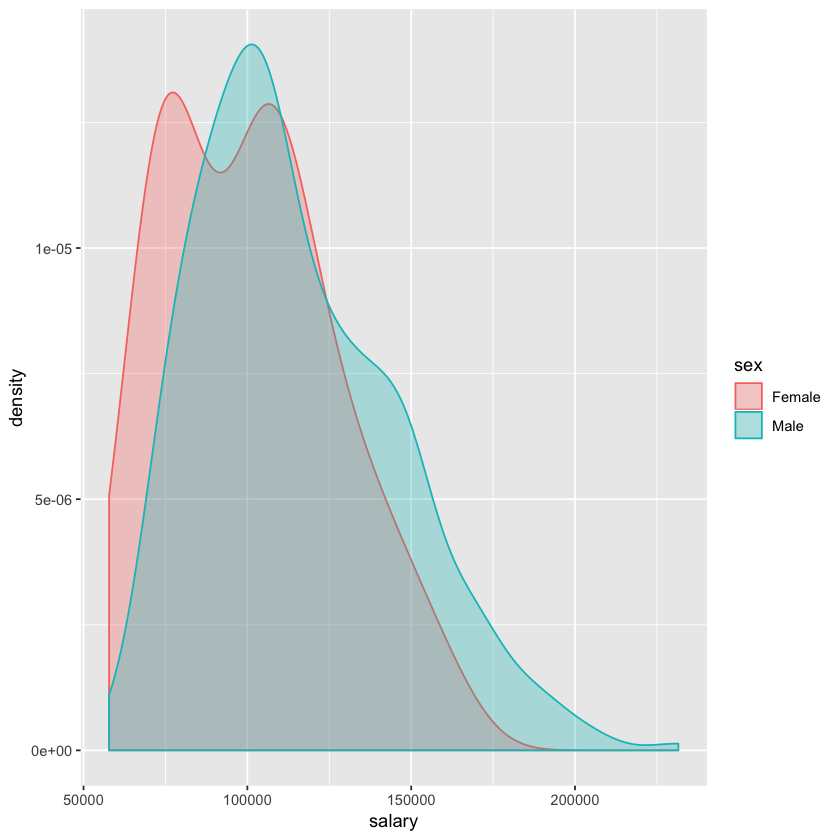

In [11]:
ggplot(data = salaries, aes(x=salary, color=sex, fill = sex)) + geom_density(alpha=0.3)

Warning message:
“position_dodge requires non-overlapping x intervals”

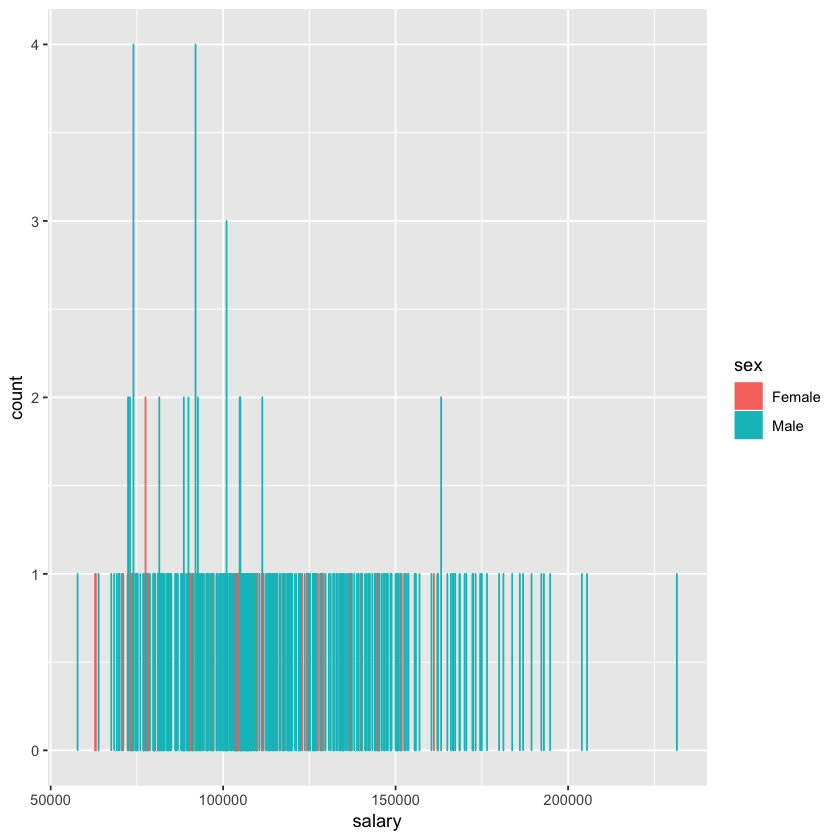

In [12]:
ggplot(data = salaries, aes(x=salary, color=sex, fill = sex)) + geom_bar(position="dodge")

In [13]:
?geom_bar

In [16]:
{warning = FALSE}
{message=FALSE}
library("ggplot2")
library("dplyr")
library("gridExtra")


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



rank,sex,mean.salaries
AssocProf,Female,88512.80
AssocProf,Male,94869.70
AsstProf,Female,78049.91
AsstProf,Male,81311.46
Prof,Female,121967.61
Prof,Male,127120.82


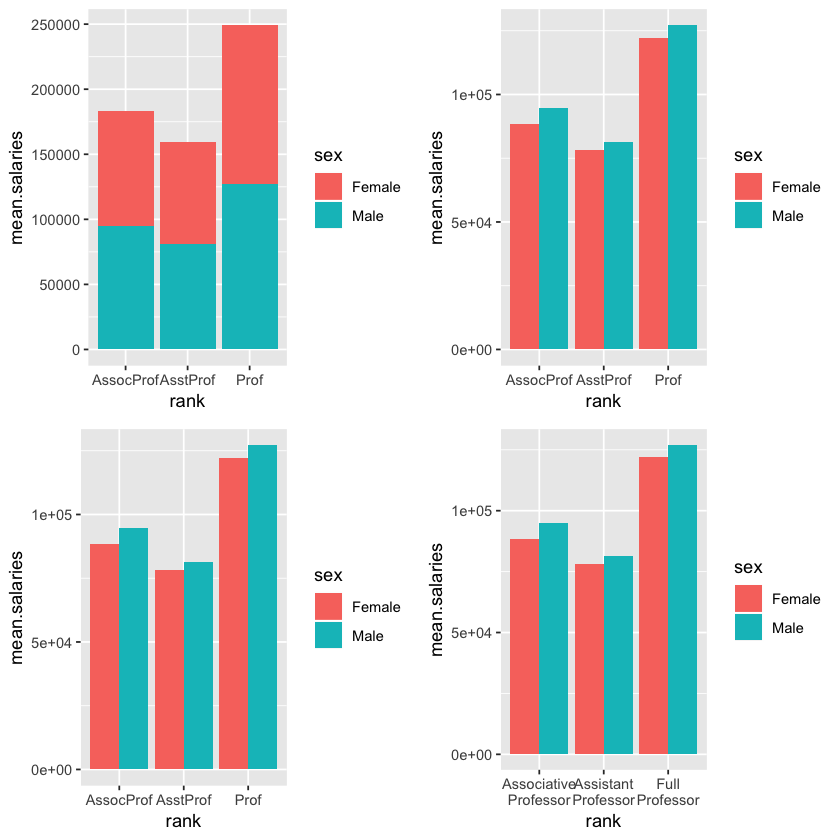

In [19]:
salaries = read.csv("./data/Salaries.csv")
dat = salaries %>% group_by(rank, sex) %>% summarise(mean.salaries = mean(salary))
dat #整理数据到合适的形式

# 通过fill来使得出现不同段的颜色来分类
p1 = ggplot(data = dat, aes(x = rank, y = mean.salaries, fill = sex)) + geom_col()
p2 = ggplot(data = dat, aes(x = rank, y = mean.salaries, fill = sex)) + geom_col(position = "dodge")
p3 = ggplot(data = dat, aes(x = rank, y = mean.salaries, fill = sex)) + geom_bar(position = "dodge", stat = "identity")
p4 = ggplot(data = dat, aes(x = rank, y = mean.salaries, fill = sex)) + geom_bar(position = "dodge", stat = "identity") + scale_x_discrete(breaks = c("AsstProf", "AssocProf", "Prof"), labels = c("Assistant\nProfessor", "Associative\nProfessor", "Full\nProfessor"))
grid.arrange(p1, p2, p3, p4, ncol=2)  #ggplot2 的图需要使用gridExtra才能并在一起